Housing EDA

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#import ml_insights as mli

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, LassoCV

In [180]:
%matplotlib inline

# Load Data and basic EDA

In [181]:
## Load in the Ames Housing Data
datafile = "AmesHousing.csv"
df=pd.read_csv(datafile)

Basic EDA

In [182]:
# Shape

df.shape

(2930, 82)

Remove spaces from column names

In [183]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

df.columns

Index(['order', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
      

Numeric and non-numeric columns

In [184]:
df.dtypes

order               int64
pid                 int64
ms_subclass         int64
ms_zoning          object
lot_frontage      float64
                   ...   
mo_sold             int64
yr_sold             int64
sale_type          object
sale_condition     object
saleprice           int64
Length: 82, dtype: object

In [185]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
num_numeric_columns = len(numeric_columns)

non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
num_non_numeric_columns = len(non_numeric_columns)

print(f"Number of numeric columns: {num_numeric_columns}")
print(f"Number of non-numeric columns: {num_non_numeric_columns}")

Number of numeric columns: 39
Number of non-numeric columns: 43


Looking at nulls

In [186]:
df.isna().any()

order             False
pid               False
ms_subclass       False
ms_zoning         False
lot_frontage       True
                  ...  
mo_sold           False
yr_sold           False
sale_type         False
sale_condition    False
saleprice         False
Length: 82, dtype: bool

In [187]:
df.columns[df.isna().any()]

Index(['lot_frontage', 'alley', 'mas_vnr_type', 'mas_vnr_area', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'electrical', 'bsmt_full_bath', 'bsmt_half_bath', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars',
       'garage_area', 'garage_qual', 'garage_cond', 'pool_qc', 'fence',
       'misc_feature'],
      dtype='object')

In [188]:
df.isna().sum().sort_values(ascending=False).head(20)

pool_qc           2917
misc_feature      2824
alley             2732
fence             2358
mas_vnr_type      1775
fireplace_qu      1422
lot_frontage       490
garage_cond        159
garage_finish      159
garage_yr_blt      159
garage_qual        159
garage_type        157
bsmt_exposure       83
bsmtfin_type_2      81
bsmt_qual           80
bsmt_cond           80
bsmtfin_type_1      80
mas_vnr_area        23
bsmt_full_bath       2
bsmt_half_bath       2
dtype: int64

Fill nulls

In [189]:
# Most nulls look like features some houses don't have. We can fill these with 0s or "None" depending on the feature.

df[numeric_columns] = df[numeric_columns].fillna(0)
df[non_numeric_columns] = df[non_numeric_columns].fillna('None')

View single record

In [190]:
df.head(1)

order        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0      1  526301100           20        RL         141.0     31770   Pave   

  alley lot_shape land_contour  ... pool_area pool_qc fence misc_feature  \
0  None       IR1          Lvl  ...         0    None  None         None   

  misc_val mo_sold yr_sold sale_type  sale_condition  saleprice  
0        0       5    2010       WD           Normal     215000  

[1 rows x 82 columns]

In [191]:
df.iloc[0]

order                     1
pid               526301100
ms_subclass              20
ms_zoning                RL
lot_frontage          141.0
                    ...    
mo_sold                   5
yr_sold                2010
sale_type               WD 
sale_condition       Normal
saleprice            215000
Name: 0, Length: 82, dtype: object

View individual variables

In [192]:
df['lot_frontage'].describe()

count    2930.000000
mean       57.647782
std        33.499441
min         0.000000
25%        43.000000
50%        63.000000
75%        78.000000
max       313.000000
Name: lot_frontage, dtype: float64

In [193]:
df['condition_1'].value_counts() # looks like ordinal

condition_1
Norm      2522
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: count, dtype: int64

In [194]:
df['condition_1'].unique()

array(['Norm', 'Feedr', 'PosN', 'RRNe', 'RRAe', 'Artery', 'PosA', 'RRAn',
       'RRNn'], dtype=object)

In [195]:
df['year_built'].value_counts()

year_built
2005    142
2006    138
2007    109
2004     99
2003     88
       ... 
1882      1
1898      1
1907      1
1875      1
1913      1
Name: count, Length: 118, dtype: int64

In [196]:
df['year_remod/add'].value_counts()

year_remod/add
1950    361
2006    202
2007    164
2005    141
2004    111
       ... 
1986     13
1981     13
2010     13
1983     11
1982      9
Name: count, Length: 61, dtype: int64

In [197]:
df['garage_area'].value_counts()

garage_area
0.0      158
576.0     97
440.0     96
484.0     76
240.0     69
        ... 
715.0      1
902.0      1
595.0      1
581.0      1
405.0      1
Name: count, Length: 603, dtype: int64

In [198]:
df['total_bsmt_sf'].value_counts()

total_bsmt_sf
0.0       80
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
839.0      1
1146.0     1
1415.0     1
1684.0     1
1003.0     1
Name: count, Length: 1058, dtype: int64

# Select features

View corr plots

In [199]:
df[numeric_columns].corr()

order       pid  ms_subclass  lot_frontage  lot_area  \
order            1.000000  0.173593     0.011797      0.008748  0.031354   
pid              0.173593  1.000000    -0.001281     -0.038104  0.034868   
ms_subclass      0.011797 -0.001281     1.000000     -0.233959 -0.204613   
lot_frontage     0.008748 -0.038104    -0.233959      1.000000  0.136862   
lot_area         0.031354  0.034868    -0.204613      0.136862  1.000000   
overall_qual    -0.048500 -0.263147     0.039419      0.128840  0.097188   
overall_cond    -0.011054  0.104451    -0.067349     -0.034675 -0.034759   
year_built      -0.052319 -0.343388     0.036579      0.026130  0.023258   
year_remod/add  -0.075566 -0.157111     0.043397      0.069509  0.021682   
mas_vnr_area    -0.031045 -0.225672     0.003634      0.109858  0.125950   
bsmtfin_sf_1    -0.032268 -0.098674    -0.059767      0.067034  0.191692   
bsmtfin_sf_2    -0.002758 -0.001245    -0.070847     -0.005254  0.083198   
bsmt_unf_sf      0.005842 -0.088102    -0.129987      0.139290  0.023883   
total_bsmt_sf   -0.028572 -0.190240    -0.218489      0.206080  0.253765   
1st_flr_sf      -0.013201 -0.141902    -0.247828      0.241707  0.332235   
2nd_flr_sf      -0.000417 -0.003289     0.304237     -0.002813  0.032996   
low_qual_fin_sf  0.013589  0.056940     0.025765      0.019315  0.000812   
gr_liv_area     -0.009342 -0.107579     0.068061      0.186767  0.285599   
bsmt_full_bath  -0.042499 -0.038306     0.014187      0.019554  0.124208   
bsmt_half_bath   0.024987  0.004154    -0.003179     -0.031798  0.026448   
full_bath       -0.044985 -0.171431     0.134631      0.082826  0.127433   
half_bath       -0.039749 -0.166636     0.175879     -0.029367  0.035497   
bedroom_abvgr    0.015424  0.006345    -0.019208      0.112718  0.136569   
kitchen_abvgr   -0.017685  0.076470     0.257698      0.022127 -0.020301   
totrms_abvgrd    0.002612 -0.068981     0.031898      0.200488  0.216597   
fireplaces      -0.019156 -0.108056    -0.049955      0.051240  0.256989   
garage_yr_blt   -0.022540 -0.161131    -0.103184      0.014302  0.073049   
garage_cars     -0.036869 -0.238044    -0.046074      0.142774  0.179456   
garage_area     -0.036085 -0.211172    -0.103374      0.186780  0.212749   
wood_deck_sf    -0.011292 -0.051135    -0.017310      0.001162  0.157212   
open_porch_sf    0.016355 -0.071311    -0.014823      0.085480  0.103760   
enclosed_porch   0.027908  0.162519    -0.022866      0.024824  0.021868   
3ssn_porch      -0.024975 -0.024894    -0.037956      0.004061  0.016243   
screen_porch     0.004307 -0.025735    -0.050614      0.045789  0.055044   
pool_area        0.052518 -0.002845    -0.003434      0.109439  0.093775   
misc_val        -0.006083 -0.008260    -0.029254      0.003098  0.069188   
mo_sold          0.133365 -0.050455     0.000350      0.017357  0.003859   
yr_sold         -0.975993  0.009579    -0.017905     -0.011737 -0.023085   
saleprice       -0.031408 -0.246521    -0.085092      0.201875  0.266549   

                 overall_qual  overall_cond  year_built  year_remod/add  \
order               -0.048500     -0.011054   -0.052319       -0.075566   
pid                 -0.263147      0.104451   -0.343388       -0.157111   
ms_subclass          0.039419     -0.067349    0.036579        0.043397   
lot_frontage         0.128840     -0.034675    0.026130        0.069509   
lot_area             0.097188     -0.034759    0.023258        0.021682   
overall_qual         1.000000     -0.094812    0.597027        0.569609   
overall_cond        -0.094812      1.000000   -0.368773        0.047680   
year_built           0.597027     -0.368773    1.000000        0.612095   
year_remod/add       0.569609      0.047680    0.612095        1.000000   
mas_vnr_area         0.423089     -0.132472    0.306797        0.191740   
bsmtfin_sf_1         0.284458     -0.051341    0.280069        0.152240   
bsmtfin_sf_2        -0.041122      0.040992   -0.027328       -0.061934   
bsmt

Heatmap

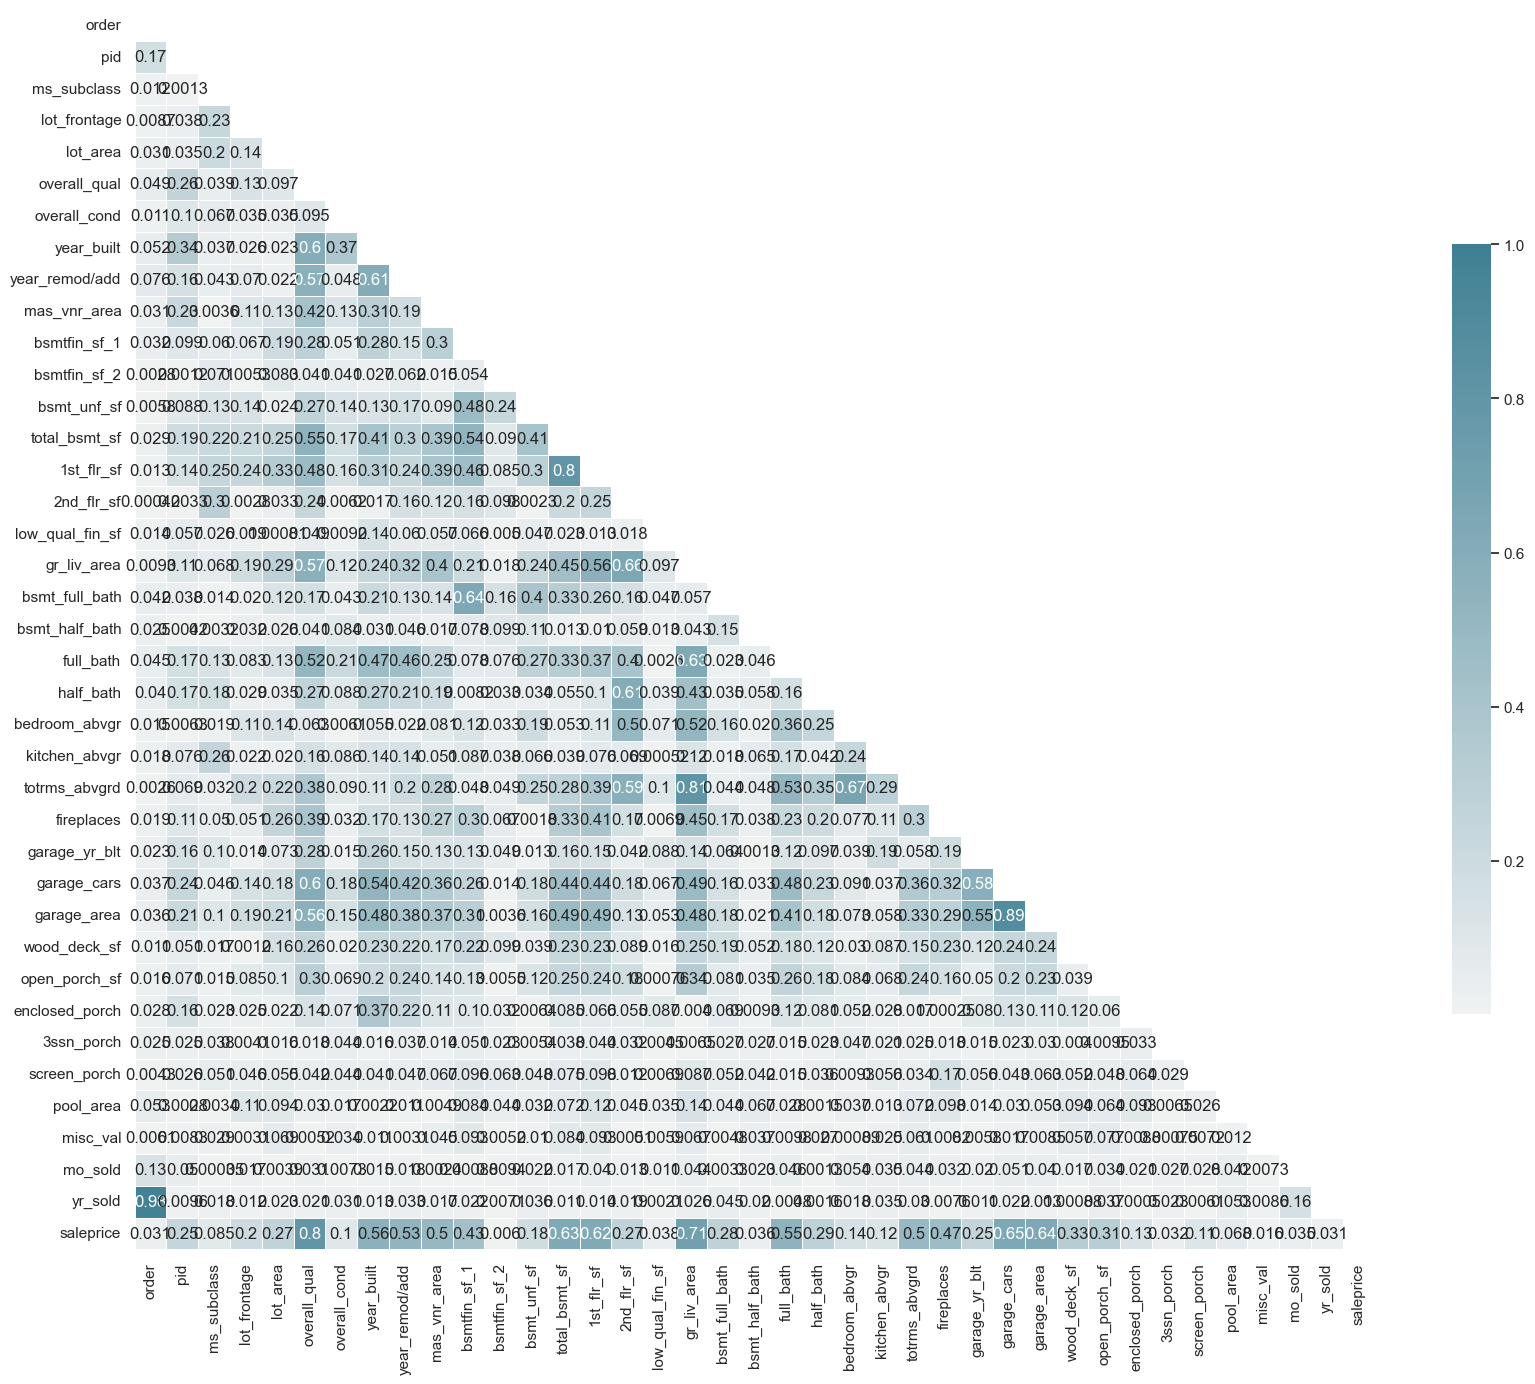

In [200]:
sns.set(style="white")

# Compute the correlation matrix
corr = df[numeric_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool) # Return an array of zeros with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True # Return the indices for the upper-triangle of arr

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(np.abs(corr), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, annot = True, cbar_kws={"shrink": .5}); # annot argument adds numbers

plt.show()

Select most_corr_columns

In [201]:
most_corr_columns = df[numeric_columns].corr().nlargest(10, 'saleprice')['saleprice'].index

most_corr_columns

Index(['saleprice', 'overall_qual', 'gr_liv_area', 'garage_cars',
       'garage_area', 'total_bsmt_sf', '1st_flr_sf', 'year_built', 'full_bath',
       'year_remod/add'],
      dtype='object')

In [202]:
sns.set(style="white")

# Compute the correlation matrix
corr = df[most_corr_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool) # Return an array of zeros with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True # Return the indices for the upper-triangle of arr

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(np.abs(corr), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, annot = True, cbar_kws={"shrink": .5}); # annot argument adds numbers

Select some columns

In [203]:
['order', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'garage_finish', 'garage_cars', 'garage_area', 'garage_qual',
       'garage_cond', 'paved_drive', 'wood_deck_sf', 'open_porch_sf',
       'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'pool_qc',
       'fence', 'misc_feature', 'misc_val', 'mo_sold', 'yr_sold', 'sale_type',
       'sale_condition', 'saleprice']

['order',
 'pid',
 'ms_subclass',
 'ms_zoning',
 'lot_frontage',
 'lot_area',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_

# Modeling workflow overview

1. Select features and target
2. T-T split
3. Fit model
4. Model prediction
5. View residuals
6. Assess model
7. View features

# Model 1:  single var Lin reg

Select features and target

In [204]:
selected_features_1 = most_corr_columns.drop('saleprice')[0] # drop the target variable
selected_features_1

'overall_qual'

In [205]:
X1 = df.loc[:,[selected_features_1]]
y1 = df['saleprice']

T-T split

In [206]:
#Split the data 70-30 train/test

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((2051, 1), (879, 1), (2051,), (879,))

Fit model

In [207]:
lr_model1 = LinearRegression()
lr_model1.fit(X_train1, y_train1)

LinearRegression()

In [208]:
lr_model1.coef_, lr_model1.intercept_

(array([44369.05645059]), -89974.33932082876)

Single var against target

In [209]:
# yhat = 44369.06(overall_qual) - 89974.34

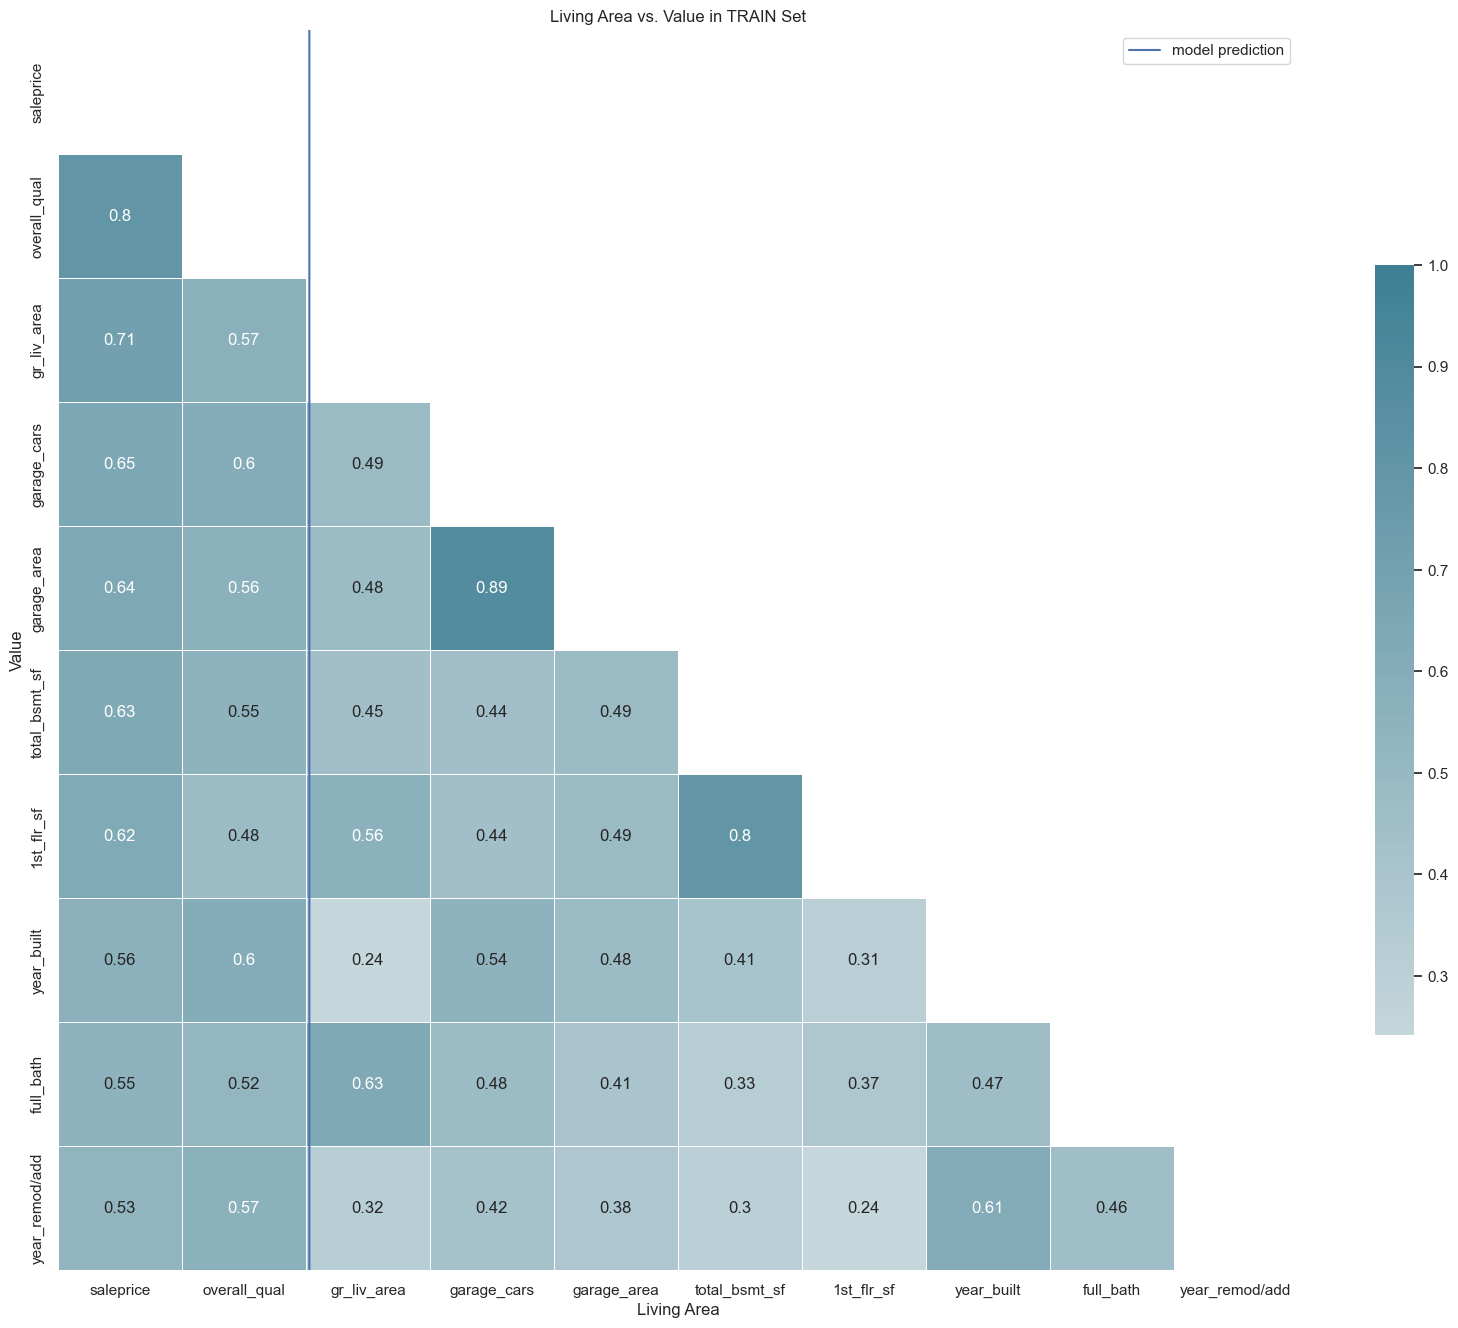

In [210]:
plt.scatter(X_train1,y_train1,alpha=.05, label=None)
vec1 = np.linspace(0,4000,1000) # just a set of X points to grab y-hat
    # np.linspace(min, max, n points)
pred_vec1 = lr_model1.intercept_ + lr_model1.coef_[0]*vec1 
                                        # coef[0] because even though only one coef, returns array
plt.plot(vec1, pred_vec1, label='model prediction')
plt.title('Living Area vs. Value in TRAIN Set')
plt.xlabel('Living Area');
plt.ylabel('Value')
plt.legend()
plt.show()

Model prediction

In [211]:
### Get the predictions on the training set
# train_set_pred1 = lr_model1.predict(X_train.loc[:,[selected_features_1]])
train_set_pred1 = lr_model1.predict(X_train1)

In [212]:
### Get the predictions on the test set
test_set_pred1 = lr_model1.predict(X_test1)

test_set_pred1

array([264978.11228392, 176239.99938273, 220609.05583333,  87501.88648155,
       176239.99938273, 176239.99938273, 264978.11228392, 176239.99938273,
        87501.88648155, 264978.11228392, 220609.05583333, 264978.11228392,
        87501.88648155, 131870.94293214,  43132.83003095, 176239.99938273,
       176239.99938273, 220609.05583333, 131870.94293214, 176239.99938273,
       220609.05583333, 131870.94293214, 176239.99938273, 220609.05583333,
       220609.05583333, 264978.11228392, 353716.22518511, 220609.05583333,
       220609.05583333, 220609.05583333, 220609.05583333,  87501.88648155,
       264978.11228392,  87501.88648155, 176239.99938273,  87501.88648155,
       220609.05583333, 264978.11228392, 176239.99938273, 220609.05583333,
       309347.16873451, 176239.99938273, 220609.05583333, 176239.99938273,
       131870.94293214, 264978.11228392, 176239.99938273, 131870.94293214,
       131870.94293214, 131870.94293214, 220609.05583333, 131870.94293214,
       176239.99938273, 2

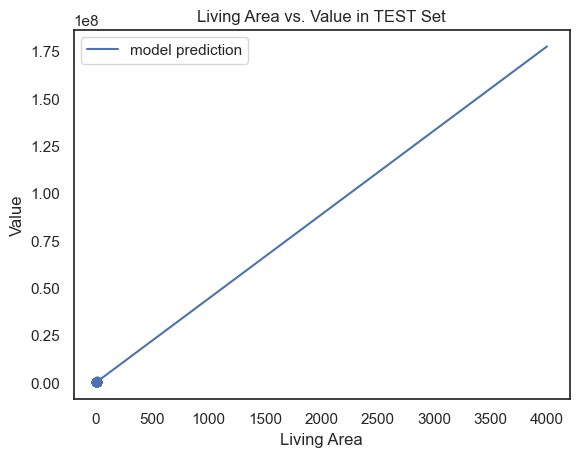

In [213]:
### Plot the regression line on top of the data
plt.scatter(X_test1,y_test1,alpha=.1, label=None)
vec1 = np.linspace(0,4000,1000)
plt.plot(vec1, pred_vec1, label='model prediction')
plt.title('Living Area vs. Value in TEST Set')
plt.xlabel('Living Area')
plt.ylabel('Value')
plt.legend()
plt.show()

Plot residuals

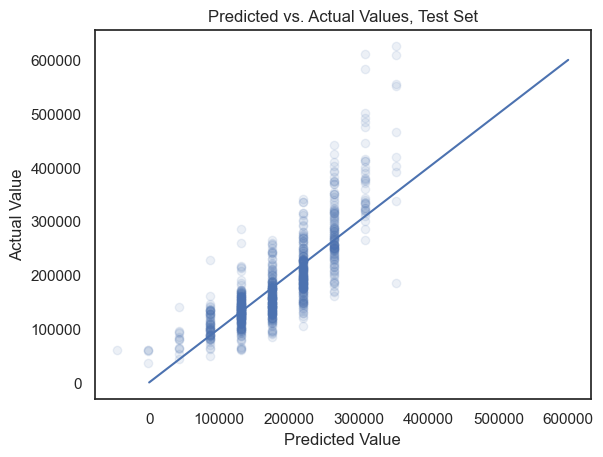

In [214]:
## Plot predicted vs actual - more like residuals

plt.scatter(test_set_pred1,y_test1,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))
plt.title('Predicted vs. Actual Values, Test Set')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show();

Plot residuals AV

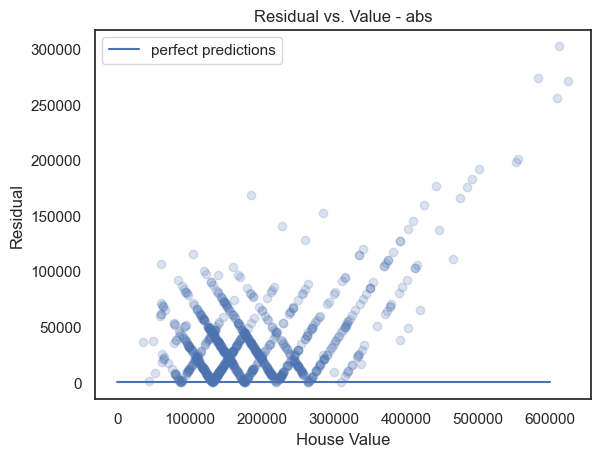

In [215]:
## Residual Plot - ABSOLUTE VAL
## Plot predicted vs actual 
residual1 = np.abs(y_test1-test_set_pred1)

plt.scatter(y_test1, residual1, alpha=.2, label=None)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000), label='perfect predictions');
plt.xlabel('House Value')
plt.ylabel('Residual')
plt.title('Residual vs. Value - abs')
plt.legend()
plt.show()

Assess model

In [216]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [217]:
# r2
lr_model1.score(X_test1, y_test1)

0.658290464307834

In [218]:
mae1 = mean_absolute_error(y_test1,test_set_pred1)
train_mae1 = mean_absolute_error(y_train1,lr_model1.predict(X_train1))
print(f"Train MAD: {train_mae1:.2f}")
print(f"Val MAD: {mae1:.2f}")

Train MAD: 33366.62
Val MAD: 34331.89


In [219]:
rmse1 = np.sqrt(mean_squared_error(y_test1,test_set_pred1))
train_rmse1 = np.sqrt(mean_squared_error(y_train1,lr_model1.predict(X_train1)))
print(f"Train RMSE: {train_rmse1:.2f}")
print(f"Val RMSE: {rmse1:.2f}")

Train RMSE: 47588.82
Val RMSE: 49010.43


Overfit example
- Train RMSE: 12,245.36
- Test RMSE: 55,396.91<br>
(poor performance on unseen data means bad generalization)


Underfit example
- Train RMSE: 654,245.36
- Test RMSE: 655,396.91

# Model 2: multivar regression

Select features and target

In [222]:
selected_features_2 = most_corr_columns.drop('saleprice') # drop the target variable

selected_features_2

Index(['overall_qual', 'gr_liv_area', 'garage_cars', 'garage_area',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'full_bath',
       'year_remod/add'],
      dtype='object')

In [223]:
X2 = df.loc[:,selected_features_2]
y2 = df['saleprice']

T-T split

In [224]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape


((2051, 9), (879, 9), (2051,), (879,))

Fit model

In [225]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train2, y_train2)
lr_model2.coef_, lr_model2.intercept_

(array([ 1.98515177e+04,  5.21672329e+01,  8.44095365e+03,  1.95595996e+01,
         1.85442943e+01,  1.26502088e+01,  3.19218854e+02, -8.78313742e+03,
         2.98613379e+02]),
 -1285218.731379103)

Model prediction

In [226]:
### Get the predictions on the training set
train_set_pred2 = lr_model2.predict(X_train2)

In [227]:
### Get the predictions on the test set
test_set_pred2 = lr_model2.predict(X_test2)

test_set_pred2

array([196591.69250246, 126219.42318515, 217816.45043103, 100188.40661623,
       124953.18500544, 191467.07762301, 204630.75744762, 165275.51472642,
        72889.81257278, 312360.16924163, 241498.5697405 , 238253.24217691,
        91157.71482417, 182710.236613  ,  96246.42550053, 161322.6767913 ,
       162578.95957576, 213025.10801288, 138812.7328001 , 149857.46887   ,
       219399.02672965, 144259.56532462, 198646.96735691, 221075.9661368 ,
       212085.86925612, 290564.26904552, 331004.45773531, 232162.37754866,
       214747.55660723, 223337.23876111, 207912.64148167,  58433.90438981,
       255478.94864744,  97831.06043513, 147891.23722711,  94274.51054321,
       210111.78227169, 279326.07563119, 205957.82870478, 227765.23602411,
       322607.97058242, 193228.6499881 , 226228.40309959, 201477.92610962,
        96399.79092529, 299104.70161738, 182262.00172857, 165829.59727206,
       158319.60350061, 124800.52156504, 196981.58804636, 124872.4672592 ,
       148429.64679067, 2

View residuals

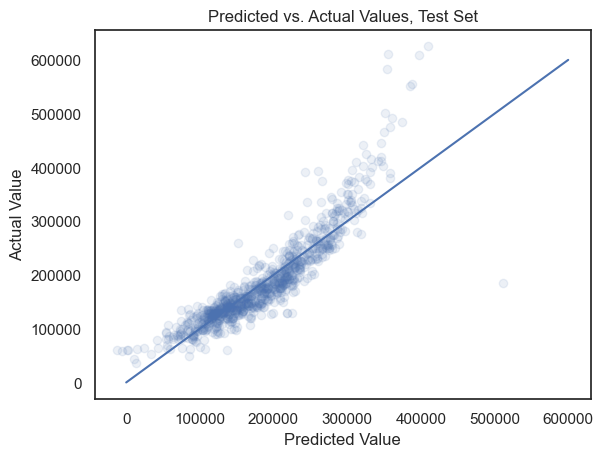

In [228]:
## Plot predicted vs actual - more like residuals

plt.scatter(test_set_pred2,y_test2,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))
plt.title('Predicted vs. Actual Values, Test Set')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

Assess model

In [229]:
# r2
lr_model2.score(X_test2, y_test2)

0.812914021381136

In [230]:
mae2 = mean_absolute_error(y_test2,test_set_pred2)
train_mae2 = mean_absolute_error(y_train2,train_set_pred2)
print(f"Train MAD: {train_mae2:.2f}")
print(f"Val MAD: {mae2:.2f}")

Train MAD: 23604.57
Val MAD: 23472.66


In [232]:
rmse2 = np.sqrt(mean_squared_error(y_test2,test_set_pred2))
train_rmse2 = np.sqrt(mean_squared_error(y_train2,train_set_pred2))
print(f"Train RMSE: {train_rmse2:.2f}")
print(f"Val RMSE: {rmse2:.2f}")

Train RMSE: 36245.83
Val RMSE: 36264.41


View features

In [233]:
list(zip(X_train2.columns,lr_model2.coef_))

[('overall_qual', 19851.517684062997),
 ('gr_liv_area', 52.16723289775298),
 ('garage_cars', 8440.953650466643),
 ('garage_area', 19.55959960582267),
 ('total_bsmt_sf', 18.544294322148257),
 ('1st_flr_sf', 12.650208815522566),
 ('year_built', 319.21885401378),
 ('full_bath', -8783.137419001609),
 ('year_remod/add', 298.6133789972611)]

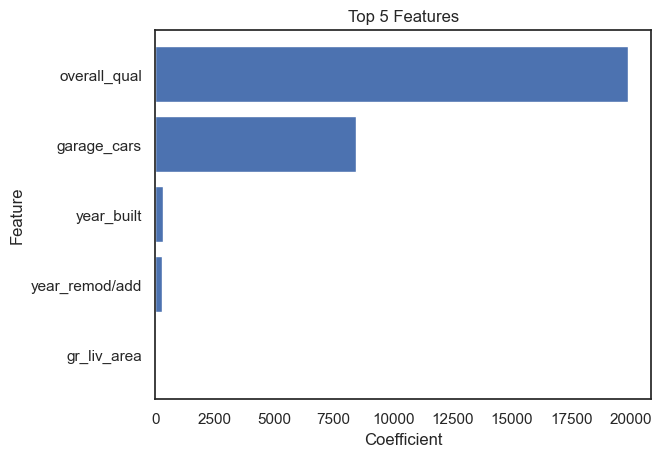

In [234]:
feature_df2 = pd.DataFrame(list(zip(X2.columns, lr_model2.coef_,))).rename(columns={0:'feature', 1: 'coefficient'})
feature_df2.sort_values(by = 'coefficient', ascending= False)
# most important features
plt.barh(feature_df2.sort_values(by = 'coefficient').tail(5).feature, 
         feature_df2.sort_values(by = 'coefficient').tail(5).coefficient)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 5 Features')
plt.show();

Learning curve

In [235]:
# # Copied & edited from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve
# from sklearn.model_selection import ShuffleSplit
# from sklearn.metrics import mean_squared_error, r2_score, make_scorer


# def plot_learning_curve(estimator, title, X, y, scoring=None, axes=None, ylim=None, cv=None,
#                         n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
#     if axes is None:
#         _, axes = plt.subplots(1, 3, figsize=(20, 5))

#     axes[0].set_title(title)
#     if ylim is not None:
#         axes[0].set_ylim(*ylim)
#     axes[0].set_xlabel("Training examples")
#     axes[0].set_ylabel("Score")

#     train_sizes, train_scores, test_scores, fit_times, _ = \
#         learning_curve(estimator, 
#                        X, 
#                        y, 
#                        cv=cv, 
#                        scoring=scoring,
#                        n_jobs=n_jobs, 
#                        train_sizes=train_sizes, 
#                        return_times=True)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     fit_times_mean = np.mean(fit_times, axis=1)
#     fit_times_std = np.std(fit_times, axis=1)

#     # Plot learning curve
#     axes[0].grid()
#     axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
#                          train_scores_mean + train_scores_std, alpha=0.1,
#                          color="r")
#     axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1,
#                          color="g")
#     axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
#                  label="Training score")
#     axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
#                  label="Cross-validation score")
#     axes[0].legend(loc="best")

#     # Plot n_samples vs fit_times
#     axes[1].grid()
#     axes[1].plot(train_sizes, fit_times_mean, 'o-')
#     axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
#                          fit_times_mean + fit_times_std, alpha=0.1)
#     axes[1].set_xlabel("Training examples")
#     axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability of the model")

#     # Plot fit_time vs score
#     axes[2].grid()
#     axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
#     axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1)
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")

#     return plt



# title = "Learning Curves Linear Regression"
# # Cross validation with 100 iterations to get smoother mean test and train
# # score curves, each time with 20% data randomly selected as a validation set.
# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

# estimator = LinearRegression()
# plot_learning_curve(estimator, title, X, y, scoring=make_scorer(r2_score), cv=cv, n_jobs=4)


# plt.show()

# Model 3: top 20

Select features and target

In [236]:
selected_features_3 = df[numeric_columns].corr().nlargest(20, 'saleprice')['saleprice'].index
selected_features_3 = selected_features_3.drop('saleprice')
selected_features_3

Index(['overall_qual', 'gr_liv_area', 'garage_cars', 'garage_area',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'full_bath',
       'year_remod/add', 'mas_vnr_area', 'totrms_abvgrd', 'fireplaces',
       'bsmtfin_sf_1', 'wood_deck_sf', 'open_porch_sf', 'half_bath',
       'bsmt_full_bath', '2nd_flr_sf', 'lot_area'],
      dtype='object')

In [237]:
X3 = df.loc[:,selected_features_3]
y3 = df['saleprice']

T-t split

In [238]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

Fit model

In [239]:
lr_model3 = LinearRegression()
lr_model3.fit(X_train3,y_train3) # fit on all available features of Xtrain

LinearRegression()

Model prediction

In [240]:
### Get the predictions on the training set
train_set_pred3 = lr_model3.predict(X_train3)

In [241]:
### Get the predictions on the test set
test_set_pred3 = lr_model3.predict(X_test3)

test_set_pred3

array([198515.64776249, 127651.76224049, 215403.20346491, 103693.57025729,
       128944.37142264, 176001.17661681, 203150.61677228, 160919.35074782,
        70454.97878089, 315885.34267256, 244384.76265219, 247229.13290137,
        82148.54439007, 152332.09828382, 104842.59863742, 174712.37330523,
       155802.54498122, 204519.57475889, 127202.29306107, 157054.6133297 ,
       200271.09123894, 144509.38388446, 208898.22495014, 219731.00310355,
       204245.6513627 , 305111.31888169, 312367.97697519, 238472.84510259,
       211096.73211844, 210369.87502347, 199404.07180727,  60133.4653487 ,
       231339.56639412,  81100.42141693, 143137.10196878,  81280.47263258,
       190846.24195709, 280832.12732556, 190409.19293766, 238404.6323575 ,
       316855.62748754, 223262.89955232, 235354.01649108, 221208.64077985,
        96545.36603385, 310909.69157273, 166025.75252483, 164106.27976476,
       160332.06377586, 129353.48943741, 189906.56066163, 128740.51966792,
       147197.74141752, 1

View residuals

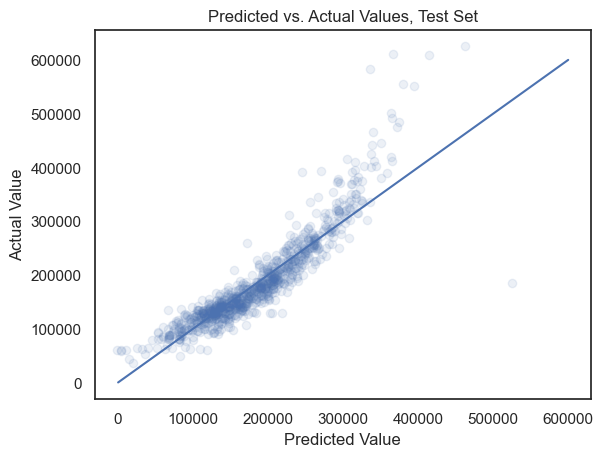

In [242]:
## Plot predicted vs actual - more like residuals

plt.scatter(test_set_pred3, y_test3, alpha=.1)
plt.plot(np.linspace(0, 600000, 1000), np.linspace(0, 600000, 1000))
plt.title('Predicted vs. Actual Values, Test Set')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show();

Assess model

In [243]:
# r2
lr_model3.score(X_test3, y_test3)

0.832482751899066

In [244]:
mae3 = mean_absolute_error(y_test3, test_set_pred3)
train_mae3 = mean_absolute_error(y_train3, train_set_pred3)
print(f"Train MAD: {train_mae3:.2f}")
print(f"Val MAD: {mae3:.2f}")

Train MAD: 21663.03
Val MAD: 21693.96


In [245]:
rmse3 = np.sqrt(mean_squared_error(y_test3, test_set_pred3))
train_rmse3 = np.sqrt(mean_squared_error(y_train3, train_set_pred3))
print(f"Train RMSE: {train_rmse3:.2f}")
print(f"Val RMSE: {rmse3:.2f}")

Train RMSE: 34243.91
Val RMSE: 34315.45


View features

In [246]:
list(zip(X_train3.columns,lr_model3.coef_))[:10]

[('overall_qual', 19317.123426654274),
 ('gr_liv_area', 26.531213101827284),
 ('garage_cars', 7403.254095687228),
 ('garage_area', 15.650215679317256),
 ('total_bsmt_sf', 10.317511416264113),
 ('1st_flr_sf', 25.02361787966227),
 ('year_built', 243.5475331221053),
 ('full_bath', -3820.5839643234917),
 ('year_remod/add', 338.32975987428733),
 ('mas_vnr_area', 29.514917254001453)]

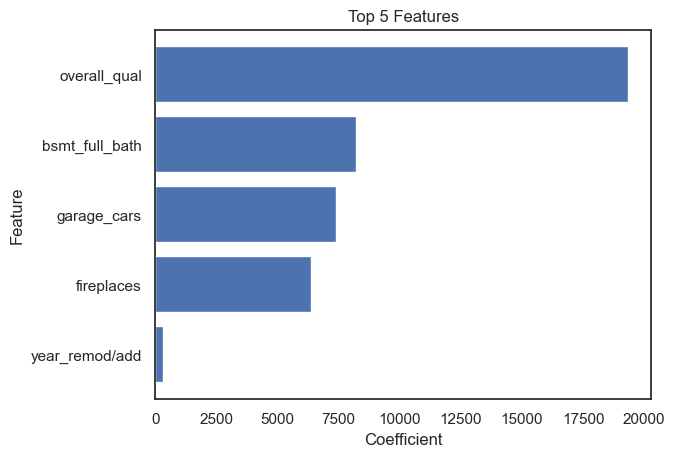

In [247]:
feature_df3 = pd.DataFrame(list(zip(X3.columns, lr_model3.coef_,))).rename(columns={0:'feature', 1: 'coefficient'})
feature_df3.sort_values(by = 'coefficient', ascending= False)
# most important features
plt.barh(feature_df3.sort_values(by = 'coefficient').tail(5).feature, 
         feature_df3.sort_values(by = 'coefficient').tail(5).coefficient)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 5 Features')
plt.show();

# Model 4: quadratic factor

Investigating a non-linear relationship with overall quality

In [248]:
# get the mean of the saleprice for each quality level:
    # 1. go through each unique quality level in X_train : unq = list(X_train['overall_qual'].unique())
    # 2. return TF array of X_train values that equal that unique quality level : X_train['overall_qual'] == qual
    # 3. get the y_train values that match the positions (indices) of the matching unique quality levels by masking y_train (should be around 20 or so) : y_train[X_train['overall_qual'] == qual]
    # 4. get the mean of those saleprices and append to means : y_train[X_train['overall_qual'] == qual].mean()
    # 5. append to means list : means.append(y_train[X_train['overall_qual'] == qual].mean())

unq = list(X_train3['overall_qual'].unique())
unq.sort()

means = []
for qual in unq:
    means.append(y_train3[X_train3['overall_qual'] == qual].mean())

means

[44633.333333333336,
 51768.666666666664,
 84964.4074074074,
 106152.94267515924,
 135224.82666666666,
 162988.0262664165,
 204955.9675810474,
 268298.7763157895,
 361843.55555555556,
 448267.6666666667]

In [249]:
# get the mean of the saleprice for each quality level:

pd.concat([X_train3,y_train3], axis=1).groupby('overall_qual').agg({'saleprice': 'mean'}).reset_index()

overall_qual      saleprice
0             1   44633.333333
1             2   51768.666667
2             3   84964.407407
3             4  106152.942675
4             5  135224.826667
5             6  162988.026266
6             7  204955.967581
7             8  268298.776316
8             9  361843.555556
9            10  448267.666667

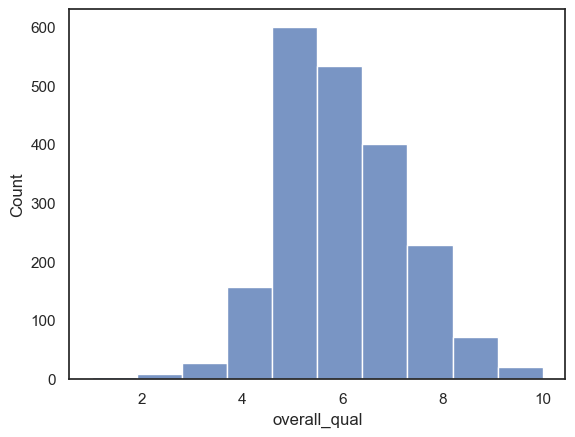

In [250]:
sns.histplot(X_train3.overall_qual, bins=10)
plt.show()

In [251]:
X_train3.columns

Index(['overall_qual', 'gr_liv_area', 'garage_cars', 'garage_area',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'full_bath',
       'year_remod/add', 'mas_vnr_area', 'totrms_abvgrd', 'fireplaces',
       'bsmtfin_sf_1', 'wood_deck_sf', 'open_porch_sf', 'half_bath',
       'bsmt_full_bath', '2nd_flr_sf', 'lot_area'],
      dtype='object')

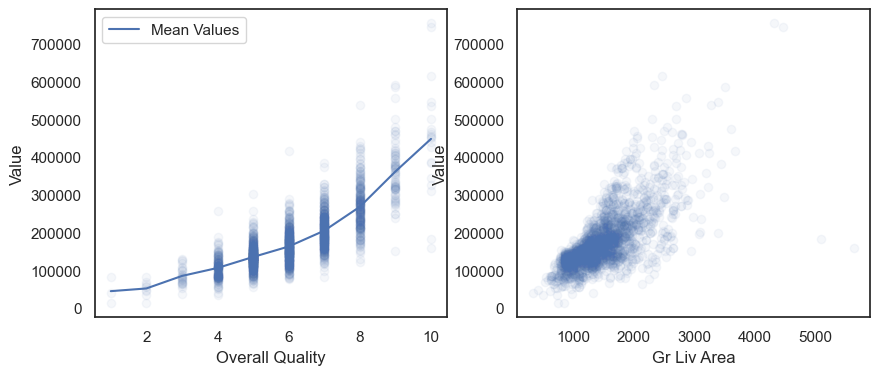

In [252]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].scatter(X_train3['overall_qual'],y_train3, alpha = .05, label=None)
ax[0].plot(unq, means, label='Mean Values')
ax[0].set_xlabel('Overall Quality')
ax[0].set_ylabel('Value')
ax[0].legend()
ax[1].scatter(X_train3['gr_liv_area'],y_train3, alpha = .05)
ax[1].set_xlabel('Gr Liv Area')
ax[1].set_ylabel('Value')
plt.show()

Let's try adding in `'Overall Qual'` *squared* as a predictor variable

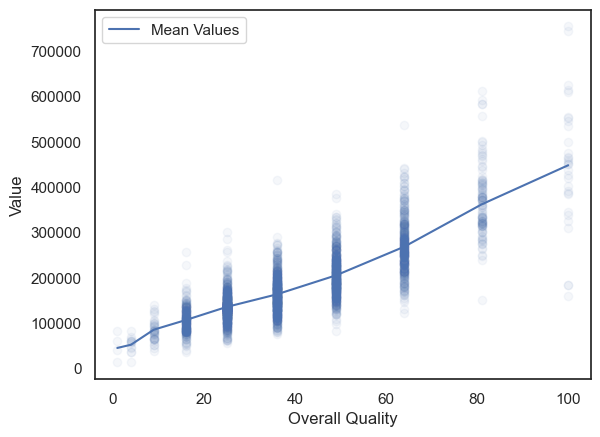

In [253]:
df['OQ2'] = df['overall_qual']**2
unq = list(df['OQ2'].unique())
unq.sort()
plt.scatter(df['OQ2'],y3, alpha = .05, label=None)
plt.plot(unq, means, label='Mean Values')
plt.xlabel('Overall Quality')
plt.ylabel('Value')
plt.legend()
plt.show()

Select features and target

In [254]:
most_corr_columns

Index(['saleprice', 'overall_qual', 'gr_liv_area', 'garage_cars',
       'garage_area', 'total_bsmt_sf', '1st_flr_sf', 'year_built', 'full_bath',
       'year_remod/add'],
      dtype='object')

In [258]:
selected_features_4 = list(most_corr_columns.drop('saleprice')) + ['OQ2']
X4 = df.loc[:,selected_features_4]
y4 = df['saleprice']

T-T split

In [259]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3,random_state=42)

Fit model

In [260]:
lr_model4 = LinearRegression()
lr_model4.fit(X_train4,y_train4)

LinearRegression()

Model prediction

In [261]:
### Get the predictions on the training set
train_set_pred4 = lr_model4.predict(X_train4)

In [262]:
### Get the predictions on the test set
test_set_pred4 = lr_model4.predict(X_test4)

View residuals

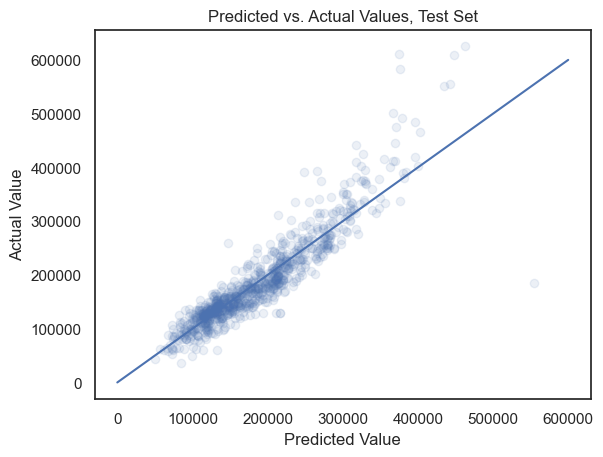

In [263]:
## Plot predicted vs actual - more like residuals

plt.scatter(test_set_pred4, y_test4,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))
plt.title('Predicted vs. Actual Values, Test Set')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show();

Assess model

In [264]:
# r2
lr_model4.score(X_test4, y_test4)

0.842039712093102

In [265]:
mae4 = mean_absolute_error(y_test4,test_set_pred4)
train_mae4 = mean_absolute_error(y_train4,train_set_pred4)
print(f"Train MAD: {train_mae4:.2f}")
print(f"Val MAD: {mae4:.2f}")

Train MAD: 21674.19
Val MAD: 21395.58


In [266]:
rmse4 = np.sqrt(mean_squared_error(y_test4,test_set_pred4))
train_rmse4 = np.sqrt(mean_squared_error(y_train4,train_set_pred4))
print(f"Train RMSE: {train_rmse4:.2f}")
print(f"Val RMSE: {rmse4:.2f}")

Train RMSE: 34055.26
Val RMSE: 33322.22


View features

In [267]:
list(zip(X_train4.columns,lr_model4.coef_))

[('overall_qual', -35823.84984829539),
 ('gr_liv_area', 50.40839866371891),
 ('garage_cars', 11217.037566079574),
 ('garage_area', 3.783343901663379),
 ('total_bsmt_sf', 20.302223648232147),
 ('1st_flr_sf', 5.185703684401865),
 ('year_built', 318.9251664714279),
 ('full_bath', -7181.181931610085),
 ('year_remod/add', 297.57478847352314),
 ('OQ2', 4570.553747238229)]

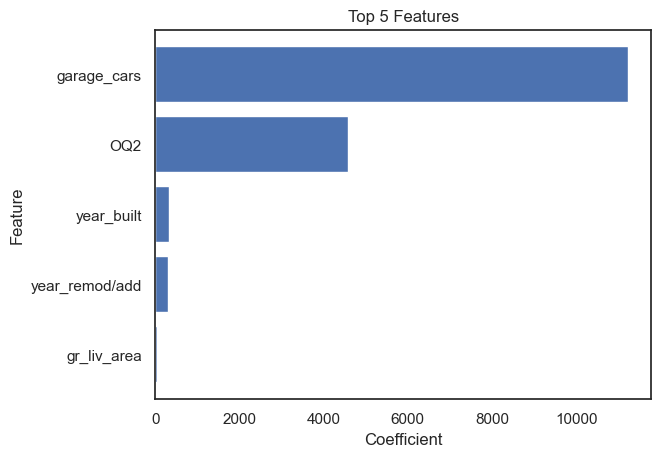

In [268]:
feature_df4 = pd.DataFrame(list(zip(X4.columns, lr_model4.coef_,))).rename(columns={0:'feature', 1: 'coefficient'})
feature_df4.sort_values(by = 'coefficient', ascending= False)
# most important features
plt.barh(feature_df4.sort_values(by = 'coefficient').tail(5).feature, 
         feature_df4.sort_values(by = 'coefficient').tail(5).coefficient)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 5 Features')
plt.show();

Did r2 improve?

- r2 with all good features: 0.83
- r2 with good features and quadratic: 0.84

Yes!

Did RMSE improve?
- RMSE with all good features: 34,243.91 (train), 34,315.45 (val)
- RMSE with good features and quadratic: 34,055.26 (train), 33,322.22 (val)

Yes!

# Model 5: Regularization

In [269]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV #, LinearRegression, LogisticRegression

Select features and target

In [270]:
# same as above

selected_features_5 = list(most_corr_columns.drop('saleprice')) + ['OQ2']
X5 = df.loc[:,selected_features_5]
y5 = df['saleprice']

T-T split

In [271]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.3,random_state=42)

Fit model

In [272]:
lr_model5 = Lasso(alpha = 1e4) # alpha == lambda
    # as alpha increases, importance of features reduces and coefs drops off
    # so LASSO has features selection benefit
lr_model5.fit(X_train5,y_train5)

Lasso(alpha=10000.0)

Model prediction

In [273]:
### Get the predictions on the training set
train_set_pred5 = lr_model5.predict(X_train5)

In [274]:
### Get the predictions on the test set
test_set_pred5 = lr_model5.predict(X_test5)

View residuals

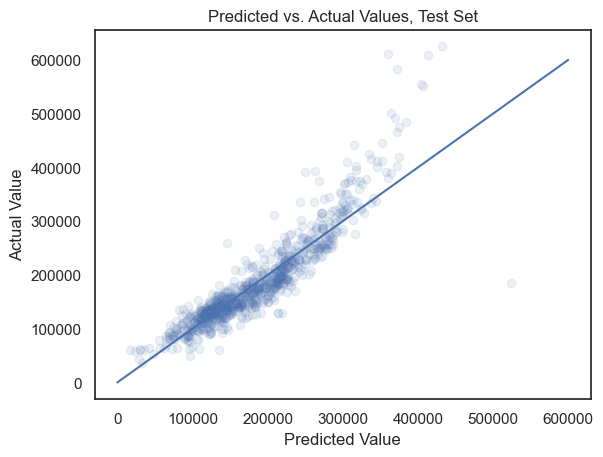

In [275]:
## Plot predicted vs actual - more like residuals

plt.scatter(test_set_pred5, y_test5, alpha=.1)
plt.plot(np.linspace(0,600000,1000), np.linspace(0,600000,1000))
plt.title('Predicted vs. Actual Values, Test Set')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show();

Assess model

In [276]:
# r2
lr_model5.score(X_test5, y_test5)

0.8296011457005371

In [277]:
mae5 = mean_absolute_error(y_test5, test_set_pred5)
train_mae5 = mean_absolute_error(y_train5, train_set_pred5)
print(f"Train MAD: {train_mae5:.2f}")
print(f"Val MAD: {mae5:.2f}")

Train MAD: 22562.49
Val MAD: 22371.74


In [278]:
rmse5 = np.sqrt(mean_squared_error(y_test5, test_set_pred5))
train_rmse5 = np.sqrt(mean_squared_error(y_train5, train_set_pred5))
print(f"Train RMSE: {train_rmse5:.2f}")
print(f"Val RMSE: {rmse5:.2f}")

Train RMSE: 35157.93
Val RMSE: 34609.34


In [279]:
print(
    'rmse for four models, in order: ', 
    round(rmse1), 
    round(rmse2), 
    round(rmse3), 
    round(rmse4),
    round(rmse5)
)


rmse for four models, in order:  49010 36264 34315 33322 34609


# Model 6: Cross validation

### Cross-Validation
Cross validation is a more sophisticated, yet more time intensive alternative to a single train-test split.  The idea is to divide your data set into "folds" (e.g. 5 equally sized subsets of your data).  We then iteratively select each fold to be the test set and the rest to be the training set.  We then judge the performance on the 5 different test folds.

This is frequently done to select "nuisance parameters".  You can try a bunch of different values, see which one gives the best results on cross validation, and then train your model on the entire data set using the best parameter value.

Define alpha

In [280]:
alphavec = 10**np.linspace(-3,9,27)
alphavec

array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03, 2.89426612e+03, 8.37677640e+03,
       2.42446202e+04, 7.01703829e+04, 2.03091762e+05, 5.87801607e+05,
       1.70125428e+06, 4.92388263e+06, 1.42510267e+07, 4.12462638e+07,
       1.19377664e+08, 3.45510729e+08, 1.00000000e+09])

Select features and target

In [281]:
# same as above

selected_features_6 = list(most_corr_columns.drop('saleprice')) + ['OQ2']
X6 = df.loc[:,selected_features_6]
y6 = df['saleprice']

T-T split

In [282]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.3,random_state=42)

Fit model

In [283]:
lr_model6 = LassoCV(alphas = alphavec, cv=5)
lr_model6.fit(X_train6, y_train6)

LassoCV(alphas=array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03, 2.89426612e+03, 8.37677640e+03,
       2.42446202e+04, 7.01703829e+04, 2.03091762e+05, 5.87801607e+05,
       1.70125428e+06, 4.92388263e+06, 1.42510267e+07, 4.12462638e+07,
       1.19377664e+08, 3.45510729e+08, 1.00000000e+09]),
        cv=5)

Determine best alpha then fits on that then returns

In [284]:
lr_model6.alpha_
list(zip(X_train6.columns,lr_model6.coef_))

[('overall_qual', -35782.770596795934),
 ('gr_liv_area', 50.4007469121284),
 ('garage_cars', 11196.505643984074),
 ('garage_area', 3.846080934113928),
 ('total_bsmt_sf', 20.299009955199008),
 ('1st_flr_sf', 5.190434889666954),
 ('year_built', 318.8810887151312),
 ('full_bath', -7168.645453319781),
 ('year_remod/add', 297.5059639620786),
 ('OQ2', 4567.426233287008)]

Model prediction

In [285]:
### Get the predictions on the training set
train_set_pred6 = lr_model6.predict(X_train6)

In [286]:
### Get the predictions on the test set
test_set_pred6 = lr_model6.predict(X_test6)

View residuals

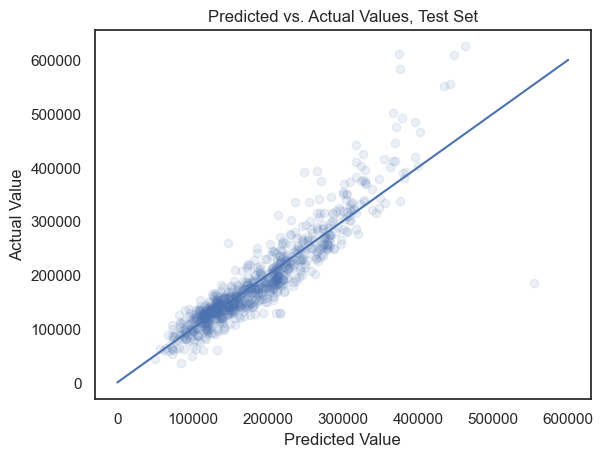

In [287]:
## Plot predicted vs actual - more like residuals

plt.scatter(test_set_pred6, y_test6, alpha=.1)
plt.plot(np.linspace(0,600000,1000), np.linspace(0,600000,1000))
plt.title('Predicted vs. Actual Values, Test Set')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show();

Assess model

In [288]:
# r2
lr_model6.score(X_test6, y_test6)

0.8420406219192433

In [289]:
mae6 = mean_absolute_error(y_test6, test_set_pred6)
train_mae6 = mean_absolute_error(y_train5, train_set_pred6)
print(f"Train MAD: {train_mae6:.2f}")
print(f"Val MAD: {mae6:.2f}")

Train MAD: 21673.92
Val MAD: 21394.84


In [290]:
rmse6 = np.sqrt(mean_squared_error(y_test6, test_set_pred6))
train_rmse6 = np.sqrt(mean_squared_error(y_train6, train_set_pred6))
print(f"Train RMSE: {train_rmse6:.2f}")
print(f"Val RMSE: {rmse6:.2f}")

Train RMSE: 34055.26
Val RMSE: 33322.13


Compare to other models

In [291]:
print(
    'rmse for four models, in order: ', 
    round(rmse1), 
    round(rmse2), 
    round(rmse3), 
    round(rmse4),
    round(rmse5),
    round(rmse6)
)


rmse for four models, in order:  49010 36264 34315 33322 34609 33322


# Model 7: Lasso with standard scaling

### Scaling Parameters
One issue with Regularized Linear Regression is that the "size" of a coefficient may be more reflective of the units or scale of the associated variable.  For example, if a distance is measured in millimeters it will have a larger coefficient than if it is measured in miles.  For this reason, best practice is to "standardize" the variables prior to running a regularized regression.  Standardizing means adding a constant and then dividing by another constant so that the resulting variable has mean 0 and standard deviation 1.  This ensures that the variables are penalized "fairly" with respect to one another.

We demonstrate how to do this below.

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Fit to train, then transform to train and test

Select features and target

In [292]:
# same as above

selected_features_7 = list(most_corr_columns.drop('saleprice')) + ['OQ2']
X7 = df.loc[:,selected_features_7]
y7 = df['saleprice']

T-T split

In [293]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.3,random_state=42)

Fit standard scaler

In [294]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
#std.fit(X_train.values.astype(float))
std.fit(X_train7)

StandardScaler()

In [295]:
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_trans = std.transform(X_train7)

View a feature before and after standard scaling:

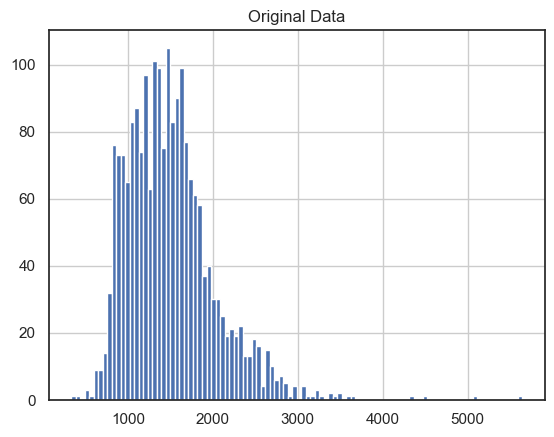

In [296]:
X_train7['gr_liv_area'].hist(bins=100);
plt.title('Original Data')
plt.show()

In [297]:
pd.DataFrame(X_trans, columns = X_train7.columns).head()

overall_qual  gr_liv_area  garage_cars  garage_area  total_bsmt_sf  \
0     -0.756619     0.979716     1.663255     1.880283      -0.107443   
1     -0.756619    -0.047833    -0.992515    -0.079750       0.879823   
2     -0.038846     0.053174     0.335370    -0.323000      -0.533146   
3      1.396700    -0.595599     0.335370     0.289803       0.322788   
4      0.678927    -0.162436     0.335370    -0.332355       0.739432   

   1st_flr_sf  year_built  full_bath  year_remod/add       OQ2  
0   -0.400301   -0.690420   0.793489       -1.629152 -0.774059  
1    0.812428   -0.065290  -1.008777        0.924802 -0.774059  
2   -0.883337    0.888856   0.793489        0.683863 -0.147676  
3    0.087874    0.625643   0.793489        0.250172  1.446751  
4    0.660837    1.119167   0.793489        0.972990  0.592594

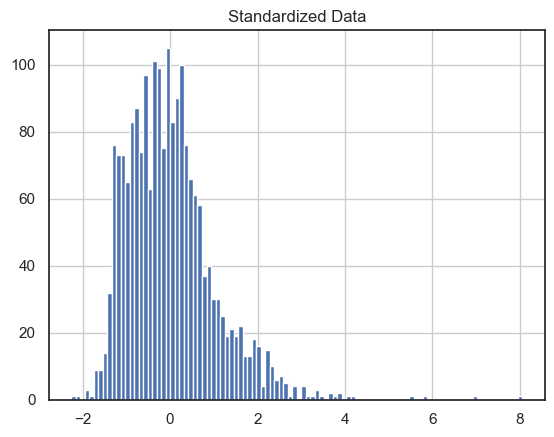

In [298]:
pd.DataFrame(X_trans, columns = X_train7.columns)['gr_liv_area'].hist(bins=100)
plt.title('Standardized Data')
plt.show()

Transform test set with scaler

In [299]:
## Apply the scaler to the test set

X_te = std.transform(X_test7)

In [300]:
## Note that even though we put a Pandas Dataframe into the scalar, what comes out is a numpy array
## In general, sklearn works on numpy.  It will accept pandas objects by trying to coerce them to numpy arrays
## But it will not output any pandas objects

type(X_train7),type(X_trans),type(X_te)

(pandas.core.frame.DataFrame, numpy.ndarray, numpy.ndarray)

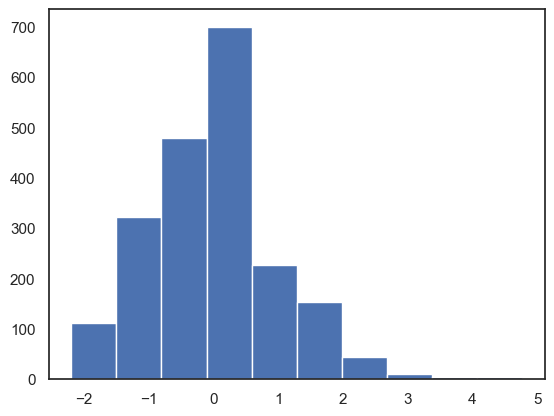

In [301]:
## Here we can plot histograms of the transformed variables
## Note that they seem to have means of 0 and stddevs of 1
## (though they do not necessarily seem to be normally distributed)

plt.hist(X_trans[:,3])
plt.show()

Apply lasso as before to fit model

In [302]:
## Fit a LASSO model on the standardized data
lr_model7 = Lasso(alpha = 1)
lr_model7.fit(X_trans,y_train7)

Lasso(alpha=1)

View coefficients (for understanding)

In [303]:
## Note, it is now difficult to interpret the coefficients
## Would have to do the math to translate back to the original scaling

feature_df=pd.DataFrame(list(zip(X_train7.columns,lr_model7.coef_)), columns = ['Feature', 'Importance'])
feature_df

Feature    Importance
0    overall_qual -49826.267131
1     gr_liv_area  25947.599972
2     garage_cars   8443.504817
3     garage_area    812.832512
4   total_bsmt_sf   8963.940686
5      1st_flr_sf   2021.388245
6      year_built   9690.626443
7       full_bath  -3981.345677
8  year_remod/add   6173.308341
9             OQ2  80183.334769

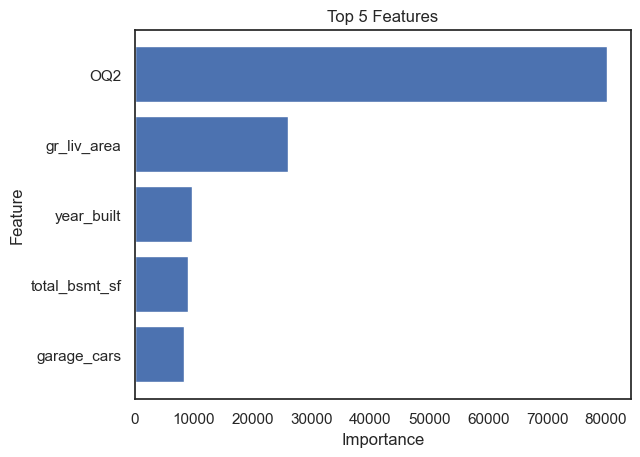

In [304]:
plt.barh(feature_df.sort_values(by = 'Importance').tail(5).Feature, 
         feature_df.sort_values(by = 'Importance').tail(5).Importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Features')
plt.show()

Predict with model

In [305]:
train_set_pred7 = lr_model7.predict(X_trans)

In [306]:
# test_set_pred7 = lr_model7.predict(pd.DataFrame(X_te,columns=X_train7.columns).loc[:,selected_features_7])
# pd.DataFrame(X_te,columns=X_train.columns)

test_set_pred7 = lr_model7.predict(pd.DataFrame(X_te,columns=X_train7.columns))

/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Assess model

In [307]:
# r2
lr_model7.score(X_test7, y_test7)

/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


-1080419.9188668227

In [308]:
mae7 = mean_absolute_error(y_test7, test_set_pred7)
train_mae7 = mean_absolute_error(y_train5, train_set_pred7)
print(f"Train MAD: {train_mae7:.2f}")
print(f"Val MAD: {mae7:.2f}")

Train MAD: 21674.41
Val MAD: 21395.53


In [309]:
rmse7 = np.sqrt(mean_squared_error(y_test7, test_set_pred7))
train_rmse7 = np.sqrt(mean_squared_error(y_train7, train_set_pred7))
print(f"Train RMSE: {train_rmse7:.2f}")
print(f"Val RMSE: {rmse7:.2f}")

Train RMSE: 34055.26
Val RMSE: 33323.05


Compare to other models

In [310]:
print(
    'rmse for four models, in order: ', 
    round(rmse1), 
    round(rmse2), 
    round(rmse3), 
    round(rmse4),
    round(rmse5),
    round(rmse6),
    round(rmse7)
)


rmse for four models, in order:  49010 36264 34315 33322 34609 33322 33323


# Model 8: Put it all together with LassoCV

## Finding the "best" value of lambda (alpha) with a single train/test split
Here we will first decide on a vector of "candidate" alpha (lambda) values.  Then, for each candidate value, we run the following steps:
1. Standardize the training data
2. Fit a LASSO model on the training data
3. Using the newly trained model, make predictions on both the training data and the test data
4. Find the sum of squares error on both the training set and test set

Then we plot how the errors change for the different values of alpha.

We can then choose the alpha which gives us the best results on the test set.

Select features and target as before

In [311]:
# same as above

selected_features_8 = list(most_corr_columns.drop('saleprice')) + ['OQ2']
X8 = df.loc[:,selected_features_8]
y8 = df['saleprice']

X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.3,random_state=42)

In [317]:
alphalist = 10**(np.linspace(-3,4,200))
err_vec_test = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    steps = [('standardize', StandardScaler()), ('lasso', Lasso(alpha = curr_alpha))]
#    steps = [('standardize', StandardScaler()), ('ridge', Ridge(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train8.loc[:,selected_features_8], y_train8)
    test_set_pred8 = pipe.predict(X_test8.loc[:,selected_features_8])
    err_vec_test[i] = np.sqrt(np.mean((test_set_pred8 - y_test8)**2))

    train_set_pred8 = pipe.predict(X_train8.loc[:,selected_features_8])
    err_vec_train[i] = np.sqrt(np.mean((train_set_pred8 - y_train8)**2))

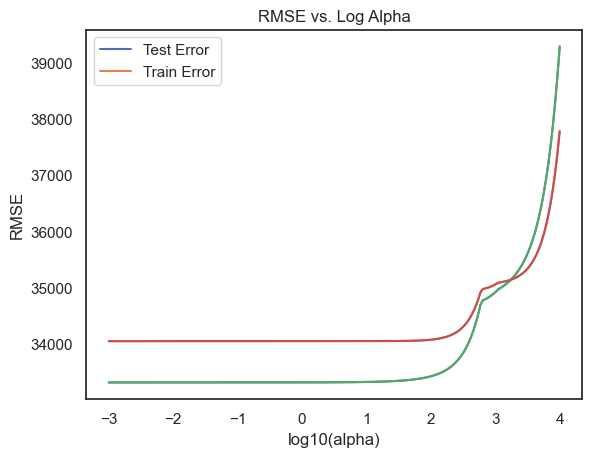

In [319]:
#plot the curves of both the training error and test error as alpha changes

plt.plot(np.log10(alphalist),err_vec_test)
plt.plot(np.log10(alphalist),err_vec_train)
plt.xlabel('log10(alpha)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Log Alpha')
plt.legend(['Test Error','Train Error'])
plt.show()

In [320]:
## This is the minimum error achieved on the test set across the different alpha values we tried

np.min(err_vec_test)

33322.22251506525

In [321]:
## This is the value of alpha that gave us the lowest error
alphalist[np.argmin(err_vec_test)]

0.001

## Using LassoCV to find the best alpha via Cross-Validation - put it all together
In the previous, we found the best alpha value by comparing the performance on a single train/test split.  An even better, though more computationally intensive method, is to do a full cross-validation when comparing the different alphas.  Fortunately, the `LassoCV` in sklearn handles this "under the hood".  You pass the `LassoCV` the list of alphas and the number of folds to use for Cross-Validation.  It will do the following:

- For each value of alpha
1. Do a cross-validation and score the result
- Find the value of alpha that gave the best score
- Fit the model on all the data using the value of alpha it just found

Then you can use the `predict` method of the model just as with all of our previous models

In [322]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train8)

StandardScaler()

In [324]:
## Scale the Predictors on both the train and test set
X_trans = std.transform(X_train8)
X_te = std.transform(X_test8)

In [326]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
lr_model8 = LassoCV(alphas = alphavec, cv=5)
lr_model8.fit(X_trans,y_train8)

LassoCV(alphas=array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03, 2.89426612e+03, 8.37677640e+03,
       2.42446202e+04, 7.01703829e+04, 2.03091762e+05, 5.87801607e+05,
       1.70125428e+06, 4.92388263e+06, 1.42510267e+07, 4.12462638e+07,
       1.19377664e+08, 3.45510729e+08, 1.00000000e+09]),
        cv=5)

In [327]:
# This is the best alpha value it found
lr_model8.alpha_

41.246263829013564

In [328]:
# These are the coefficients when it refit using that best alpha
list(zip(X_train8.columns,lr_model8.coef_))

[('overall_qual', -46477.75358027095),
 ('gr_liv_area', 25805.32978296599),
 ('garage_cars', 8291.263654846005),
 ('garage_area', 975.7367436640449),
 ('total_bsmt_sf', 8883.884911510588),
 ('1st_flr_sf', 2145.2554500765896),
 ('year_built', 9582.491530085015),
 ('full_bath', -3853.1585578510285),
 ('year_remod/add', 6092.61729458713),
 ('OQ2', 76937.74851467203)]

Predict

In [329]:
# Make predictions on the test set using the new model
test_set_pred8 = lr_model8.predict(X_te)

Assess

In [331]:
# Find the RMSE on the test set using that model
np.sqrt(np.mean((test_set_pred8 - y_test8)**2))

33360.86253339956

# 9 Finally, compare to other models

Create an all-in-one class to compare different models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

class data_modeler:
    def __init__(self, X, y, scale = True, std = StandardScaler()):
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.25, random_state=123)
        std.fit(self.X_train)
        
        self.X_tr = std.transform(self.X_train)
        self.X_te = std.transform(self.X_test)
    
    def run_linreg(self,  
                   scale = True):
        """
        Scales data and fits linreg model. Returns metrics.
        """

        self.lr_model = LinearRegression() 
        self.lr_model.fit(self.X_tr,self.y_train) # saves fitted model
        
        # Predict
        train_set_pred = self.lr_model.predict(self.X_tr)
        test_set_pred = self.lr_model.predict(self.X_te)

        ### ASSESS MODEL
        # MAE, RMSE, R^2, CV?

        # MAE
        train_mae = mean_absolute_error(self.y_train, train_set_pred)
        test_mae = mean_absolute_error(self.y_test, test_set_pred)
        print(f"Train MAE: {train_mae:.2f}")
        print(f"Test MAE: {test_mae:.2f}")

        # RMSE
        train_rmse = np.sqrt(mean_squared_error(self.y_train, train_set_pred))
        test_rmse = np.sqrt(mean_squared_error(self.y_test, test_set_pred))
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Val RMSE: {test_rmse:.2f}")

        # r2
        print(f"Train r2: {self.lr_model.score(self.X_tr, self.y_train):.3f}")
        print(f"Test r2: {self.lr_model.score(self.X_te, self.y_test):.3f}")
        
        return self.lr_model
        

    def run_ridge(self, 
              lambda_,
              std = std, 
              scale = True):
        """
        Scales data and fits ridge model. Returns fitted model. Prints metrics.
        """
        self.ridge_model = Ridge(alpha=lambda_) 
        self.ridge_model.fit(self.X_tr,self.y_train) # saves fitted model
        
        # Predict
        train_set_pred = self.ridge_model.predict(self.X_tr)
        test_set_pred = self.ridge_model.predict(self.X_te)

        ### ASSESS MODEL
        # MAE, RMSE, R^2, CV?

        # MAE
        train_mae = mean_absolute_error(self.y_train, train_set_pred)
        test_mae = mean_absolute_error(self.y_test, test_set_pred)
        print(f"Train MAE: {train_mae:.2f}")
        print(f"Test MAE: {test_mae:.2f}")

        # RMSE
        train_rmse = np.sqrt(mean_squared_error(self.y_train, train_set_pred))
        test_rmse = np.sqrt(mean_squared_error(self.y_test, test_set_pred))
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Test RMSE: {test_rmse:.2f}")

        # r2
        print(f"Train r2: {self.ridge_model.score(self.X_tr, self.y_train):.3f}")
        print(f"Test r2: {self.ridge_model.score(self.X_te, self.y_test):.3f}")
        
        return self.ridge_model

    def run_ridgeCV(self, 
                    alphas_,
                    cv = 5,
                    std = std, 
                    scale = True):
        """
        Scales data and fits ridge model. Returns fitted model. Prints metrics.
        """
        self.ridge_CV_model = RidgeCV(alphas=alphas_, cv = cv) 
        self.ridge_CV_model.fit(self.X_tr,self.y_train) # saves fitted model
        
        # Predict
        train_set_pred = self.ridge_CV_model.predict(self.X_tr)
        test_set_pred = self.ridge_CV_model.predict(self.X_te)

        ### ASSESS MODEL
        # MAE, RMSE, R^2, CV?

        # MAE
        train_mae = mean_absolute_error(self.y_train, train_set_pred)
        test_mae = mean_absolute_error(self.y_test, test_set_pred)
        print(f"Train MAE: {train_mae:.2f}")
        print(f"Test MAE: {test_mae:.2f}")

        # RMSE
        train_rmse = np.sqrt(mean_squared_error(self.y_train, train_set_pred))
        test_rmse = np.sqrt(mean_squared_error(self.y_test, test_set_pred))
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Test RMSE: {test_rmse:.2f}")

        # r2
        print(f"Train r2: {self.ridge_CV_model.score(self.X_tr, self.y_train):.3f}")
        print(f"Test r2: {self.ridge_CV_model.score(self.X_te, self.y_test):.3f}")
        
        print(f"Best alpha: {self.ridge_CV_model.alpha_}")
        return self.ridge_CV_model
     
    def run_dec_tree(self):

        self.dec_tree_model = DecisionTreeRegressor()
        self.dec_tree_model.fit(self.X_tr,self.y_train) # saves fitted model    
        
#         fig = plt.figure(figsize=(12,12))
#         plot_tree(self.dec_tree_model,filled=True,node_ids=True);
        
        # Predict
        train_set_pred = self.dec_tree_model.predict(self.X_tr)
        test_set_pred = self.dec_tree_model.predict(self.X_te)        
        
        ### ASSESS MODEL
        # MAE, RMSE, R^2, CV?

        # MAE
        train_mae = mean_absolute_error(self.y_train, train_set_pred)
        test_mae = mean_absolute_error(self.y_test, test_set_pred)
        print(f"Train MAE: {train_mae:.2f}")
        print(f"Test MAE: {test_mae:.2f}")

        # RMSE
        train_rmse = np.sqrt(mean_squared_error(self.y_train, train_set_pred))
        test_rmse = np.sqrt(mean_squared_error(self.y_test, test_set_pred))
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Test RMSE: {test_rmse:.2f}")

        # r2
        print(f"Train r2: {self.dec_tree_model.score(self.X_tr, self.y_train):.3f}")
        print(f"Test r2: {self.dec_tree_model.score(self.X_te, self.y_test):.3f}")
        
        return self.dec_tree_model
    
    def run_XGB(self,
               max_depth = 6,
               n_estimators = 10):

        self.XGB_model = XGBRegressor(max_depth=max_depth, n_estimators = n_estimators) 
        self.XGB_model.fit(self.X_tr, self.y_train) # saves fitted model
        
        # Predict
        train_set_pred = self.XGB_model.predict(self.X_tr)
        test_set_pred = self.XGB_model.predict(self.X_te)    
        
        # MAE
        train_mae = mean_absolute_error(self.y_train, train_set_pred)
        test_mae = mean_absolute_error(self.y_test, test_set_pred)
        print(f"Train MAE: {train_mae:.2f}")
        print(f"Test MAE: {test_mae:.2f}")

        # RMSE
        train_rmse = np.sqrt(mean_squared_error(self.y_train, train_set_pred))
        test_rmse = np.sqrt(mean_squared_error(self.y_test, test_set_pred))
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Val RMSE: {test_rmse:.2f}")

        # r2
        print(f"Train r2: {self.XGB_model.score(self.X_tr, self.y_train):.3f}")
        print(f"Test r2: {self.XGB_model.score(self.X_te, self.y_test):.3f}")
        
        return self.XGB_model
    
    
    
    def run_catboost(self,
                     depth = 6,
                     iterations = 10,
                     cat_features = None,
                     verbose = False):
        

        self.catboost_model = CatBoostRegressor(depth=depth, 
                                                iterations=iterations) 
        self.catboost_model.fit(self.X_tr, self.y_train,
                               cat_features=cat_features, verbose=verbose) # saves fitted model
        
        # Predict
        train_set_pred = self.catboost_model.predict(self.X_tr)
        test_set_pred = self.catboost_model.predict(self.X_te)    
        
        
        # MAE
        train_mae = mean_absolute_error(self.y_train, train_set_pred)
        test_mae = mean_absolute_error(self.y_test, test_set_pred)
        print(f"Train MAE: {train_mae:.2f}")
        print(f"Test MAE: {test_mae:.2f}")

        # RMSE
        train_rmse = np.sqrt(mean_squared_error(self.y_train, train_set_pred))
        test_rmse = np.sqrt(mean_squared_error(self.y_test, test_set_pred))
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Val RMSE: {test_rmse:.2f}")

        # r2
        print(f"Train r2: {self.catboost_model.score(self.X_tr, self.y_train):.3f}")
        print(f"Test r2: {self.catboost_model.score(self.X_te, self.y_test):.3f}")
        
        return self.catboost_model


    
    
    def plot_learning_curve(self, 
                            estimator, 
                            title,scoring=None, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
        if axes is None:
            _, axes = plt.subplots(1, 3, figsize=(20, 5))

        axes[0].set_title(title)
#         if ylim is not None:
#             axes[0].set_ylim(*ylim)
        axes[0].set_xlabel("Training examples")
        axes[0].set_ylabel("Score")

        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(estimator, 
                           self.X, 
                           self.y, 
                           cv=cv, 
                           scoring=scoring,
                           n_jobs=n_jobs, 
                           train_sizes=train_sizes, 
                           return_times=True)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        fit_times_std = np.std(fit_times, axis=1)

        # Plot learning curve
        axes[0].grid()
        axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                             train_scores_mean + train_scores_std, alpha=0.1,
                             color="r")
        axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                             test_scores_mean + test_scores_std, alpha=0.1,
                             color="g")
        axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                     label="Training score")
        axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                     label="Cross-validation score")
        axes[0].legend(loc="best")

        # Plot n_samples vs fit_times
        axes[1].grid()
        axes[1].plot(train_sizes, fit_times_mean, 'o-')
        axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                             fit_times_mean + fit_times_std, alpha=0.1)
        axes[1].set_xlabel("Training examples")
        axes[1].set_ylabel("fit_times")
        axes[1].set_title("Scalability of the model")

        # Plot fit_time vs score
        axes[2].grid()
        axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
        axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                             test_scores_mean + test_scores_std, alpha=0.1)
        axes[2].set_xlabel("fit_times")
        axes[2].set_ylabel("Score")
        axes[2].set_title("Performance of the model")

        return plt  


In [334]:
## Load in the Ames Housing Data
datafile = "AmesHousing.csv"
df=pd.read_csv(datafile)

In [335]:
larger_df = df.dropna(how = 'any',axis = 1)

In [336]:
X_large = pd.get_dummies(larger_df).drop(columns = 'SalePrice',axis=1)
y_large = larger_df['SalePrice']


In [338]:
housing = data_modeler(X_large,y_large)

### Linear regression

In [339]:
housinglr = housing.run_linreg()

Train MAE: 17320.63
Test MAE: 267451984348105.81
Train RMSE: 25484.99
Val RMSE: 7240987733375517.00
Train r2: 0.900
Test r2: -8834894666290418417664.000


In [340]:
housing.lr_model

LinearRegression()

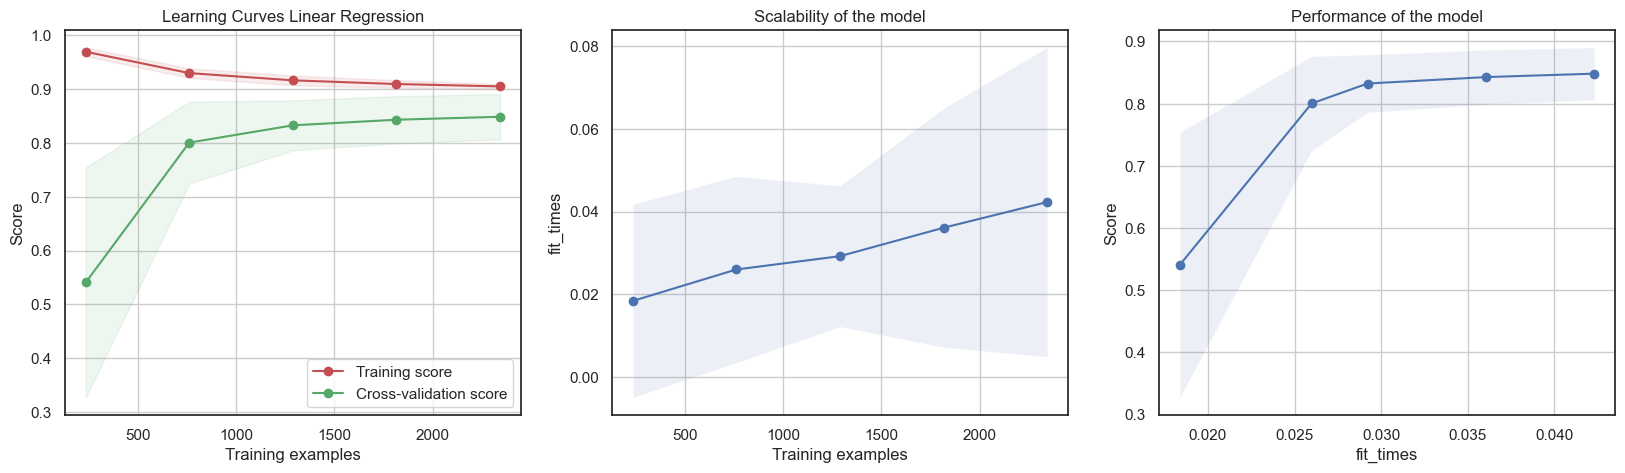

In [342]:
title = "Learning Curves Linear Regression"
cv = ShuffleSplit(n_splits=200, test_size=0.2, random_state=0)
estimator = housinglr # our saved model; can also simply do LinearRegression() here
# estimator = LinearRegression()
housing.plot_learning_curve(estimator, title, cv=cv, n_jobs=4)
# What's notable here is that the class instance contains OUR DATA, 
# thus there is no reason to specify X and y

plt.show()


### Linear regression with Ridge regularization

In [343]:
housingridge = housing.run_ridge(lambda_ = 1)

Train MAE: 16967.05
Test MAE: 17917.08
Train RMSE: 25255.76
Test RMSE: 27302.39
Train r2: 0.902
Test r2: 0.874


/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.7324e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.32002e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.03216e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.40728e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True)

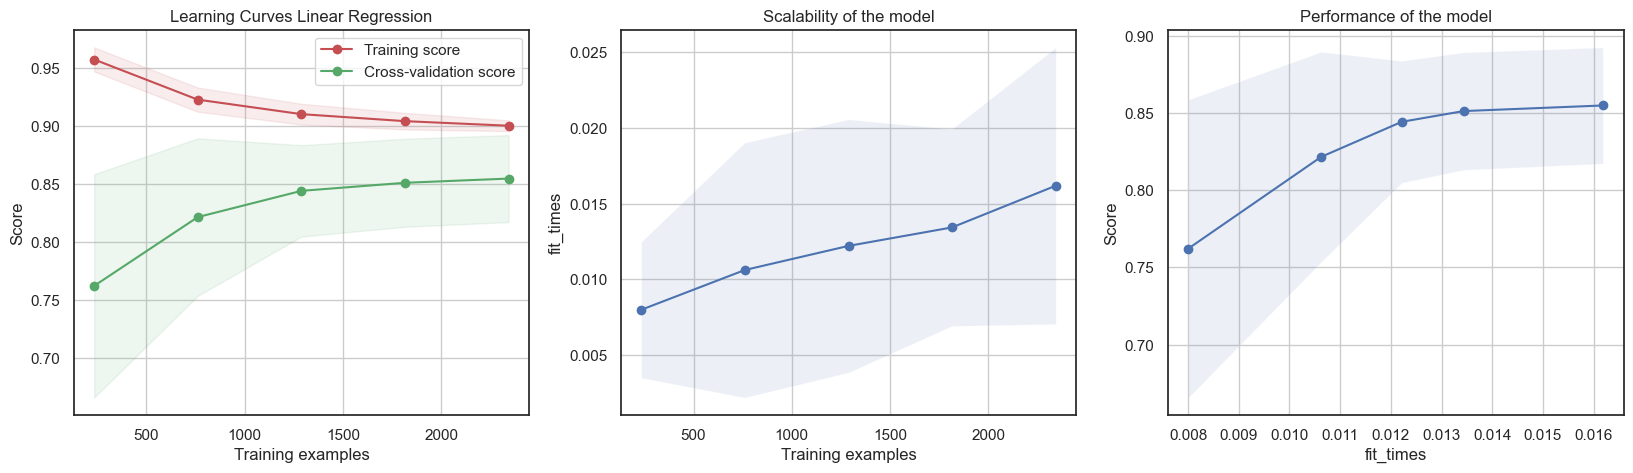

In [354]:
title = "Learning Curves Linear Regression RIDGE"
cv = ShuffleSplit(n_splits=200, test_size=0.2, random_state=0)
estimator = housingridge # our saved model; can also simply do LinearRegression() here
# estimator = LinearRegression()
housing.plot_learning_curve(estimator, title, cv=cv, n_jobs=4)
# What's notable here is that the class instance contains OUR DATA, 
# thus there is no reason to specify X and y

plt.show()

In [345]:
housing.run_ridge(lambda_ = 2)

Train MAE: 16963.06
Test MAE: 17907.35
Train RMSE: 25256.38
Test RMSE: 27286.35
Train r2: 0.902
Test r2: 0.875


Ridge(alpha=2)

### Linear regression with Ridge regularization and cross validation

In [346]:
for i in alphavec:
    print(f"alpha: {i}")
    housing.run_ridge(lambda_=i)
    print('\n')

alpha: 0.001
Train MAE: 16972.35
Test MAE: 17928.37
Train RMSE: 25255.48
Test RMSE: 27321.09
Train r2: 0.902
Test r2: 0.874


alpha: 0.0028942661247167516
Train MAE: 16972.33
Test MAE: 17928.34
Train RMSE: 25255.48
Test RMSE: 27321.05
Train r2: 0.902
Test r2: 0.874


alpha: 0.008376776400682925
Train MAE: 16972.30
Test MAE: 17928.27
Train RMSE: 25255.48
Test RMSE: 27320.93
Train r2: 0.902
Test r2: 0.874


alpha: 0.024244620170823284
Train MAE: 16972.20
Test MAE: 17928.07
Train RMSE: 25255.48
Test RMSE: 27320.61
Train r2: 0.902
Test r2: 0.874


alpha: 0.07017038286703829
Train MAE: 16971.92
Test MAE: 17927.51
Train RMSE: 25255.48
Test RMSE: 27319.68
Train r2: 0.902
Test r2: 0.874


alpha: 0.2030917620904737
Train MAE: 16971.14
Test MAE: 17925.92
Train RMSE: 25255.49
Test RMSE: 27317.02
Train r2: 0.902
Test r2: 0.874


alpha: 0.5878016072274912
Train MAE: 16969.04
Test MAE: 17921.51
Train RMSE: 25255.59
Test RMSE: 27309.71
Train r2: 0.902
Test r2: 0.874


alpha: 1.7012542798525891
Train 

In [347]:
rid = housing.run_ridgeCV(alphas_= alphavec, cv=10)
# print(f"Best alpha: {rid.alpha_}")

Train MAE: 17220.34
Test MAE: 17280.56
Train RMSE: 26126.38
Test RMSE: 26187.83
Train r2: 0.895
Test r2: 0.884
Best alpha: 345.5107294592218


In [348]:
rid.get_params()

{'alpha_per_target': False,
 'alphas': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
        7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
        4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
        3.45510729e+02, 1.00000000e+03, 2.89426612e+03, 8.37677640e+03,
        2.42446202e+04, 7.01703829e+04, 2.03091762e+05, 5.87801607e+05,
        1.70125428e+06, 4.92388263e+06, 1.42510267e+07, 4.12462638e+07,
        1.19377664e+08, 3.45510729e+08, 1.00000000e+09]),
 'cv': 10,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.41456e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.71987e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.104e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/noah/miniconda3/envs/myenv/lib/pyt

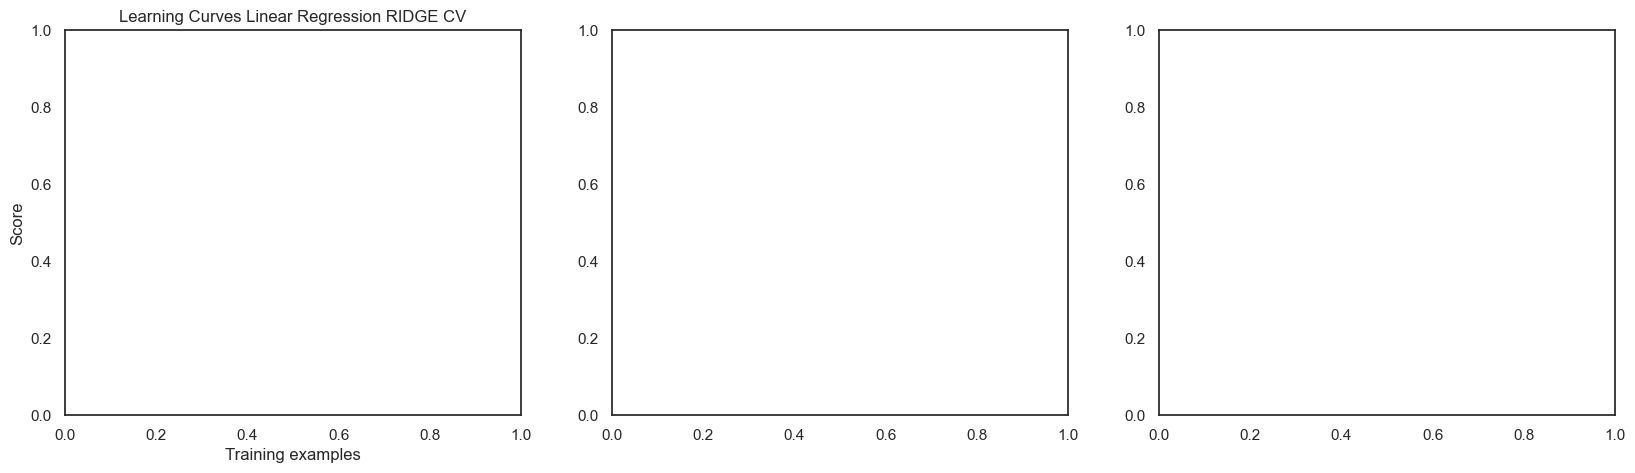

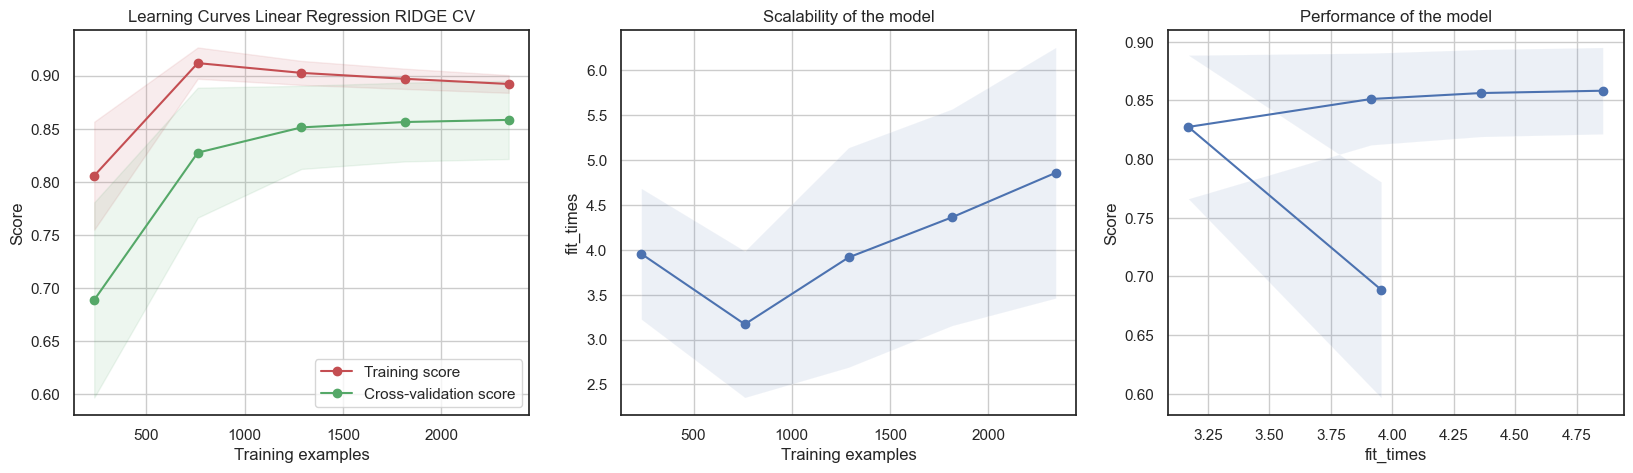

In [356]:
title = "Learning Curves Linear Regression RIDGE CV"
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator = rid # our saved model; can also simply do LinearRegression() here
# estimator = LinearRegression()
housing.plot_learning_curve(estimator, title, cv=cv, n_jobs=4)
# What's notable here is that the class instance contains OUR DATA, 
# thus there is no reason to specify X and y

plt.show()


### Decision Tree regressor

In [349]:
housing.run_dec_tree()

Train MAE: 0.00
Test MAE: 24278.87
Train RMSE: 0.00
Test RMSE: 35795.30
Train r2: 1.000
Test r2: 0.784


DecisionTreeRegressor()

### XGBoost regressor

In [350]:
housing.run_XGB()

Train MAE: 11403.81
Test MAE: 17299.15
Train RMSE: 15372.60
Val RMSE: 26017.70
Train r2: 0.964
Test r2: 0.886


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Catboost regressor

In [351]:
cats = list(X_large.select_dtypes(include = 'object').columns)
housing.run_catboost(cat_features = cats)

Train MAE: 18579.27
Test MAE: 19058.92
Train RMSE: 25704.63
Val RMSE: 27340.63
Train r2: 0.899
Test r2: 0.874


In [352]:
cats = list(X_large.select_dtypes(include = 'object').columns)
for i in range(1,16):
    print(i)
    x=housing.run_catboost(cat_features = cats, depth = i)
    print('\n')
    x.score(housing.X_train, housing.y_train)


1
Train MAE: 26522.12
Test MAE: 24315.17
Train RMSE: 37749.76
Val RMSE: 34436.60
Train r2: 0.781
Test r2: 0.800


2
Train MAE: 22529.78
Test MAE: 22369.68
Train RMSE: 32397.15
Val RMSE: 32301.59
Train r2: 0.839
Test r2: 0.824


3
Train MAE: 20139.10
Test MAE: 20393.67
Train RMSE: 28561.93
Val RMSE: 29213.78
Train r2: 0.875
Test r2: 0.856


4
Train MAE: 18678.27
Test MAE: 18999.44
Train RMSE: 26513.89
Val RMSE: 27807.29
Train r2: 0.892
Test r2: 0.870


5
Train MAE: 18952.77
Test MAE: 18603.30
Train RMSE: 26425.69
Val RMSE: 27174.38
Train r2: 0.893
Test r2: 0.876


6
Train MAE: 18579.27
Test MAE: 19058.92
Train RMSE: 25704.63
Val RMSE: 27340.63
Train r2: 0.899
Test r2: 0.874


7
Train MAE: 17410.78
Test MAE: 18747.74
Train RMSE: 24026.14
Val RMSE: 26686.65
Train r2: 0.911
Test r2: 0.880


8
Train MAE: 16676.48
Test MAE: 18471.86
Train RMSE: 22958.72
Val RMSE: 26473.17
Train r2: 0.919
Test r2: 0.882


9
Train MAE: 16214.73
Test MAE: 18885.39
Train RMSE: 22158.44
Val RMSE: 27687.71
Train r